In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
#倒入一些必要的库

In [75]:
df2 = pd.read_csv('sentiment.csv')
df2['sentiment'] = 1 - df2['sentiment']
df2.head()

,label,text,Release time,text_processed,text_len,sentiment
0,1,百年后老侠估计也股市也能出名,2024年2月25日,百年 老侠 估计 股市 出名,6,1
1,1,真别吹农夫这家伙现在搞女性疫苗发横财,2024年2月25日,真别 吹 农夫 家伙 搞 女性 疫苗 发横财,9,0
2,1,小布获悉衡昌烧坊胡润百富榜发布前三名依次为农夫山泉钟睒睒腾讯马化腾拼多多黄峥据悉今年的百富榜...,2024年2月26日,布 获悉 衡昌 烧坊 胡润 百富榜 发布 前三名 依次 农夫山泉 钟睒睒 腾讯 马化腾 拼 ...,36,1
3,1,那种都不要买,2024年2月27日,那种 买,3,0
4,1,哇哈哈速速给我出代替品抵制到退市有这个骨气,2024年2月29日,速速 出 代替品 抵制 退市 骨气,7,1


In [76]:
grouped = df2.groupby('Release time', sort=True)
df2['avg']=grouped['sentiment'].transform('mean')
df2['postive']=grouped['sentiment'].transform('sum')
df2['negative']=grouped['sentiment'].transform('count')-df2['postive']
df2.head()

,label,text,Release time,text_processed,text_len,sentiment,avg,postive,negative
0,1,百年后老侠估计也股市也能出名,2024年2月25日,百年 老侠 估计 股市 出名,6,1,0.5,1,1
1,1,真别吹农夫这家伙现在搞女性疫苗发横财,2024年2月25日,真别 吹 农夫 家伙 搞 女性 疫苗 发横财,9,0,0.5,1,1
2,1,小布获悉衡昌烧坊胡润百富榜发布前三名依次为农夫山泉钟睒睒腾讯马化腾拼多多黄峥据悉今年的百富榜...,2024年2月26日,布 获悉 衡昌 烧坊 胡润 百富榜 发布 前三名 依次 农夫山泉 钟睒睒 腾讯 马化腾 拼 ...,36,1,1.0,1,0
3,1,那种都不要买,2024年2月27日,那种 买,3,0,0.0,0,1
4,1,哇哈哈速速给我出代替品抵制到退市有这个骨气,2024年2月29日,速速 出 代替品 抵制 退市 骨气,7,1,1.0,2,0


In [77]:
df_gp=df2.groupby('Release time').mean()
df_gp.reset_index(inplace=True)
df_gp.head()

,Release time,label,text_len,sentiment,avg,postive,negative
0,2024年2月25日,1.0,7.500000,0.500000,0.500000,1.0,1.0
1,2024年2月26日,1.0,36.000000,1.000000,1.000000,1.0,0.0
2,2024年2月27日,1.0,3.000000,0.000000,0.000000,0.0,1.0
3,2024年2月29日,1.0,64.000000,1.000000,1.000000,2.0,0.0
4,2024年3月10日,1.0,12.023541,0.417605,0.417605,816.0,1138.0


In [78]:
df_gp['temp'] = 1
df_gp.head()

,Release time,label,text_len,sentiment,avg,postive,negative,temp
0,2024年2月25日,1.0,7.500000,0.500000,0.500000,1.0,1.0,1
1,2024年2月26日,1.0,36.000000,1.000000,1.000000,1.0,0.0,1
2,2024年2月27日,1.0,3.000000,0.000000,0.000000,0.0,1.0,1
3,2024年2月29日,1.0,64.000000,1.000000,1.000000,2.0,0.0,1
4,2024年3月10日,1.0,12.023541,0.417605,0.417605,816.0,1138.0,1


In [79]:
import math
df_gp['BI'] = (1+df_gp['postive'])/(1+df_gp['negative'])
df_gp['BI'] = df_gp['BI'].apply(np.log)
df_gp.head()

,Release time,label,text_len,sentiment,avg,postive,negative,temp,BI
0,2024年2月25日,1.0,7.500000,0.500000,0.500000,1.0,1.0,1,0.000000
1,2024年2月26日,1.0,36.000000,1.000000,1.000000,1.0,0.0,1,0.693147
2,2024年2月27日,1.0,3.000000,0.000000,0.000000,0.0,1.0,1,-0.693147
3,2024年2月29日,1.0,64.000000,1.000000,1.000000,2.0,0.0,1,1.098612
4,2024年3月10日,1.0,12.023541,0.417605,0.417605,816.0,1138.0,1,-0.332267


In [80]:
SI = np.zeros(len(df_gp))
SI[0] = df_gp['BI'][0]
for i in range(1,len(df_gp)):
    SI[i] = (1-(1/math.e))*df_gp['BI'][i] + (1/math.e) * SI[i-1]
df_gp.insert(loc=9,column='SI',value=SI)
df_gp.head()


,Release time,label,text_len,sentiment,avg,postive,negative,temp,BI,SI
0,2024年2月25日,1.0,7.500000,0.500000,0.500000,1.0,1.0,1,0.000000,0.000000
1,2024年2月26日,1.0,36.000000,1.000000,1.000000,1.0,0.0,1,0.693147,0.438153
2,2024年2月27日,1.0,3.000000,0.000000,0.000000,0.0,1.0,1,-0.693147,-0.276965
3,2024年2月29日,1.0,64.000000,1.000000,1.000000,2.0,0.0,1,1.098612,0.592566
4,2024年3月10日,1.0,12.023541,0.417605,0.417605,816.0,1138.0,1,-0.332267,0.007960


In [81]:
df_gp['DIS'] = abs(1-abs((df_gp['postive']-df_gp['negative'])/(df_gp['postive']+df_gp['negative']))) 
df_gp.head()

,Release time,label,text_len,sentiment,avg,postive,negative,temp,BI,SI,DIS
0,2024年2月25日,1.0,7.500000,0.500000,0.500000,1.0,1.0,1,0.000000,0.000000,1.00000
1,2024年2月26日,1.0,36.000000,1.000000,1.000000,1.0,0.0,1,0.693147,0.438153,0.00000
2,2024年2月27日,1.0,3.000000,0.000000,0.000000,0.0,1.0,1,-0.693147,-0.276965,0.00000
3,2024年2月29日,1.0,64.000000,1.000000,1.000000,2.0,0.0,1,1.098612,0.592566,0.00000
4,2024年3月10日,1.0,12.023541,0.417605,0.417605,816.0,1138.0,1,-0.332267,0.007960,0.83521


In [82]:
df_gp.tail()

,Release time,label,text_len,sentiment,avg,postive,negative,temp,BI,SI,DIS
55,2024年4月5日,1.0,8.650943,0.415094,0.415094,44.0,62.0,1,-0.336472,-0.264600,0.830189
56,2024年4月6日,1.0,9.431818,0.386364,0.386364,34.0,54.0,1,-0.451985,-0.383050,0.772727
57,2024年4月7日,1.0,16.964286,0.464286,0.464286,26.0,30.0,1,-0.138150,-0.228244,0.928571
58,2024年4月8日,1.0,13.520833,0.541667,0.541667,26.0,22.0,1,0.160343,0.017390,0.916667
59,2024年4月9日,1.0,10.833333,0.316667,0.316667,19.0,41.0,1,-0.741937,-0.462597,0.633333


In [13]:
#df_gp.to_csv("C:\\Users\\admin\\Desktop\\nlpp\\factor.csv",index=False,header=True,encoding="utf-8")

In [97]:
feanum=8#一共有多少特征
window=5#时间窗设置
df1=pd.read_csv('K线导出_09633_日线数据 - 副本.csv') #读取数据，0对应第一支股票，1对应第二只，以此类推
df1.head()

,时间,开盘,最高,最低,收盘,涨幅,振幅,成交次数,金额
0,2020/9/9,29.9381,33.5538,29.8899,32.0111,0.0964,0.3021,46124449,1544708064
1,2020/9/10,33.7466,35.4822,32.8789,34.6144,2.6033,8.1325,52844199,1888909392
2,2020/9/11,34.7108,35.2893,33.5538,33.7466,-0.8678,-2.5070,18470887,652831952
3,2020/9/14,34.1805,35.0965,34.0359,34.8555,1.1088,3.2857,12279423,441689328
4,2020/9/15,35.0001,35.0001,33.7949,34.0359,-0.8196,-2.3513,8643560,307086944


In [98]:
df1=df1.iloc[1:-10,1:]
df1.head()

,开盘,最高,最低,收盘,涨幅,振幅,成交次数,金额
1,33.7466,35.4822,32.8789,34.6144,2.6033,8.1325,52844199,1888909392
2,34.7108,35.2893,33.5538,33.7466,-0.8678,-2.5070,18470887,652831952
3,34.1805,35.0965,34.0359,34.8555,1.1088,3.2857,12279423,441689328
4,35.0001,35.0001,33.7949,34.0359,-0.8196,-2.3513,8643560,307086944
5,34.1805,34.2770,32.8789,33.1199,-0.9160,-2.6912,11973937,414673984


In [103]:
from sklearn import preprocessing#进行归一化操作
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
df.tail()

,开盘,最高,最低,收盘,涨幅,振幅,成交次数,金额
876,0.382559,0.328093,0.394321,0.356481,0.424731,0.421308,0.028904,0.028706
877,0.375095,0.335856,0.410283,0.366031,0.505609,0.514985,0.024209,0.024304
878,0.364644,0.332751,0.400706,0.375581,0.505609,0.514760,0.040013,0.040148
879,0.358673,0.318777,0.384743,0.361256,0.434246,0.432335,0.022622,0.022375
880,0.364644,0.315672,0.381551,0.346931,0.434246,0.431832,0.031000,0.030374


In [104]:
#技术问题 重新对列做一个排序
order = ['开盘', '最高', '最低', '涨幅','振幅', '成交次数', '金额','收盘']
df = df[order]
df.tail()

,开盘,最高,最低,涨幅,振幅,成交次数,金额,收盘
876,0.382559,0.328093,0.394321,0.424731,0.421308,0.028904,0.028706,0.356481
877,0.375095,0.335856,0.410283,0.505609,0.514985,0.024209,0.024304,0.366031
878,0.364644,0.332751,0.400706,0.505609,0.514760,0.040013,0.040148,0.375581
879,0.358673,0.318777,0.384743,0.434246,0.432335,0.022622,0.022375,0.361256
880,0.364644,0.315672,0.381551,0.434246,0.431832,0.031000,0.030374,0.346931


In [114]:
#这一部分在处理数据 将原始数据改造为LSTM网络的输入
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.values#pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度+1
result = []
for index in range(len(data) - sequence_length):#循环 数据长度-时间窗长度 次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到样本，样本形式为 window*feanum
cut=42#分训练集测试集 最后cut个样本为测试集
train = result[:-cut, :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[-cut:, :-1]
y_test = result[-cut:, -1][:,-1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

In [115]:
result

array([[[0.06148371, 0.04341386, 0.04886349, ..., 0.47157061,
         0.37492822, 0.05770186],
        [0.09027284, 0.03742392, 0.07040927, ..., 0.15948209,
         0.12442357, 0.03007653],
        [0.07443912, 0.03143709, 0.08580003, ..., 0.10326741,
         0.0816332 , 0.06537698],
        [0.09891078, 0.02844367, 0.07810624, ..., 0.07025601,
         0.05435455, 0.03928603],
        [0.07443912, 0.00598994, 0.04886349, ..., 0.10049379,
         0.07615825, 0.01012632],
        [0.04133251, 0.00748665, 0.051941  , ..., 0.05763279,
         0.0435759 , 0.02547337]],

       [[0.09027284, 0.03742392, 0.07040927, ..., 0.15948209,
         0.12442357, 0.03007653],
        [0.07443912, 0.03143709, 0.08580003, ..., 0.10326741,
         0.0816332 , 0.06537698],
        [0.09891078, 0.02844367, 0.07810624, ..., 0.07025601,
         0.05435455, 0.03928603],
        [0.07443912, 0.00598994, 0.04886349, ..., 0.10049379,
         0.07615825, 0.01012632],
        [0.04133251, 0.00748665, 0.051

In [116]:
#展示下训练集测试集的形状 看有没有问题
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (833, 5, 8)
y_train (833,)
X_test (42, 5, 8)
y_test (42,)


In [117]:
X_train[0]

array([[0.06148371, 0.04341386, 0.04886349, 0.72476855, 0.87918856,
        0.47157061, 0.37492822, 0.05770186],
       [0.09027284, 0.03742392, 0.07040927, 0.39449271, 0.35911035,
        0.15948209, 0.12442357, 0.03007653],
       [0.07443912, 0.03143709, 0.08580003, 0.58256658, 0.64226812,
        0.10326741, 0.0816332 , 0.06537698],
       [0.09891078, 0.02844367, 0.07810624, 0.39907895, 0.36672125,
        0.07025601, 0.05435455, 0.03928603],
       [0.07443912, 0.00598994, 0.04886349, 0.38990647, 0.35010632,
        0.10049379, 0.07615825, 0.01012632]])

In [118]:
#建立、训练模型过程
d = 0.0001
model = Sequential()#建立层次模型
model.add(LSTM(64, input_shape=(window, feanum), return_sequences=True))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(LSTM(16, input_shape=(window, feanum), return_sequences=False))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(Dense(4,kernel_initializer='uniform',activation='relu'))   #建立全连接层     
model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, epochs =100, batch_size = 256) #训练模型nb_epoch次

Epoch 1/100
4/4 [==============================] - 3s 11ms/step - loss: 0.1234 - accuracy: 0.0012
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1207 - accuracy: 0.0012
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1179 - accuracy: 0.0012
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1150 - accuracy: 0.0012
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1117 - accuracy: 0.0012
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1082 - accuracy: 0.0012
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1038 - accuracy: 0.0012
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0986 - accuracy: 0.0012
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0920 - accuracy: 0.0012
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0843 - accuracy: 0.0012
Epoch 11/100
4/4 [==

In [119]:
#总结模型
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 5, 64)             18688     
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 64)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 16)                5184      
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 23,945
Trainable params: 23,945
Non-trainable params: 0
__________________________________________________

In [120]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)[:,0]
y_train=y_train

In [121]:
y_train_predict

array([0.10389099, 0.1108643 , 0.11114939, 0.12216868, 0.13155097,
       0.1481613 , 0.15251762, 0.13511845, 0.11204186, 0.09771671,
       0.10201725, 0.11394429, 0.13000688, 0.14460845, 0.15018705,
       0.14546454, 0.14369005, 0.15545467, 0.15043724, 0.14584318,
       0.13605529, 0.1334762 , 0.13890785, 0.13690509, 0.13741988,
       0.13323894, 0.12526162, 0.12390818, 0.12398167, 0.12977357,
       0.1353185 , 0.14882062, 0.15867075, 0.1617048 , 0.17294598,
       0.17852308, 0.17325819, 0.16047737, 0.1426068 , 0.16949737,
       0.2439751 , 0.3123693 , 0.35227752, 0.35729712, 0.35246533,
       0.35724053, 0.33892915, 0.30983508, 0.2858748 , 0.27524316,
       0.29114586, 0.2941445 , 0.27985138, 0.27194083, 0.26536435,
       0.283292  , 0.29581648, 0.28659558, 0.2736531 , 0.26823616,
       0.28219277, 0.3256641 , 0.37581912, 0.42706606, 0.46473476,
       0.4618587 , 0.471003  , 0.49233305, 0.55348396, 0.60504854,
       0.655612  , 0.67699254, 0.7156348 , 0.7265296 , 0.73008

Text(0.5, 1.0, 'Train Data')

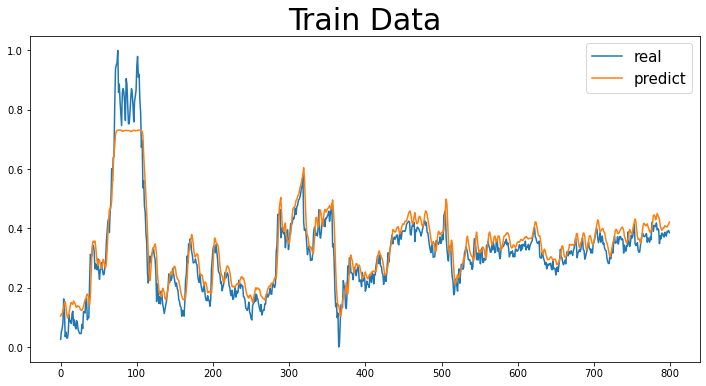

In [122]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[0:800,0].plot(figsize=(12,6))
draw.iloc[0:800,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [123]:
#在测试集上的预测
y_test_predict=model.predict(X_test)[:,0]
y_test=y_test

Text(0.5, 1.0, 'Test Data')

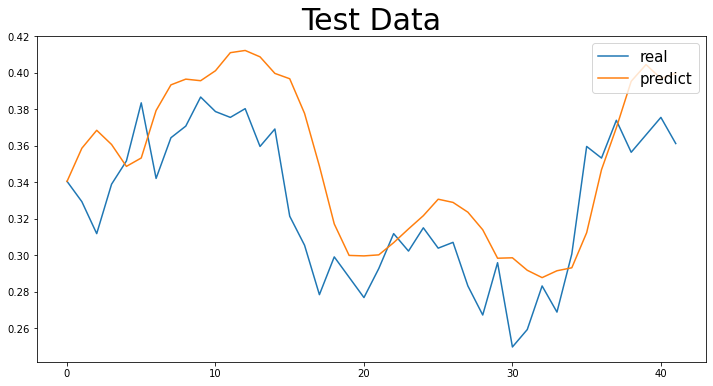

In [124]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [125]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.039685486156755524
0.002868402859694414
13.09432706232552
测试集上的MAE/MSE/MAPE
0.027667217956407857
0.001140282834793149
7.780226820386915
预测涨跌正确: 0.4634146341463415


In [226]:
len(y_train)

833

In [225]:
relative_error = 0.
for i in range(42):
    relative_error += (abs(y_test_predict[i] - y_test[i]) / y_test[i]) ** 2
acc = 1- np.sqrt(relative_error / 42)
print(f'模型的测试准确率为：{acc*100:.2f}%')


模型的测试准确率为：89.20%


In [227]:
relative_error = 0.
for i in range(833):
    relative_error += (abs(y_train_predict[i] - y_train[i]) / y_train[i]) ** 2
acc = 1- np.sqrt(relative_error / 833)
print(f'模型的测试准确率为：{acc*100:.2f}%')

模型的测试准确率为：-inf%


C:\Users\admin\AppData\Local\Temp/ipykernel_728/1029563043.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  relative_error += (abs(y_train_predict[i] - y_train[i]) / y_train[i]) ** 2


In [126]:
df2 = pd.read_csv('factor.csv')
df2.head()

,Release time,label,text_len,sentiment,avg,postive,negative,temp,BI,SI,DIS
0,2024/2/25,1,7.500000,0.500000,0.500000,1,1,1,0.000000,0.000000,1.000000
1,2024/2/26,1,36.000000,1.000000,1.000000,1,0,1,0.693147,0.438153,0.000000
2,2024/2/27,1,3.000000,0.000000,0.000000,0,1,1,-0.693147,-0.276965,0.000000
3,2024/2/29,1,64.000000,1.000000,1.000000,2,0,1,1.098612,0.592566,0.000000
4,2024/3/1,1,12.906977,0.162791,0.162791,7,36,1,-1.531476,-1.091195,0.325581


In [135]:
len(df2['BI'])

60

In [136]:
feanum=9#一共有多少特征
window=5#时间窗设置
df1=pd.read_csv('K线导出_09633_日线数据.csv') #读取数据，0对应第一支股票，1对应第二只，以此类推
df1.head()

,时间,开盘,最高,最低,收盘,涨幅,振幅,成交次数,金额,target
0,2024/2/26,44.60,44.80,44.25,44.60,-0.10,-0.2237,2363402,105429946,44.75
1,2024/2/27,44.60,44.80,44.20,44.75,0.15,0.3363,2955102,131820606,44.10
2,2024/2/28,44.80,44.85,43.75,44.10,-0.65,-1.4525,3501100,154552070,44.40
3,2024/2/29,44.00,44.75,43.95,44.40,0.30,0.6803,5031510,223557591,42.90
4,2024/3/1,43.65,43.65,42.90,42.90,-1.50,-3.3784,4850531,209192806,42.40


In [137]:
df2.head()

,Release time,label,text_len,sentiment,avg,postive,negative,temp,BI,SI,DIS
0,2024/2/25,1,7.500000,0.500000,0.500000,1,1,1,0.000000,0.000000,1.000000
1,2024/2/26,1,36.000000,1.000000,1.000000,1,0,1,0.693147,0.438153,0.000000
2,2024/2/27,1,3.000000,0.000000,0.000000,0,1,1,-0.693147,-0.276965,0.000000
3,2024/2/29,1,64.000000,1.000000,1.000000,2,0,1,1.098612,0.592566,0.000000
4,2024/3/1,1,12.906977,0.162791,0.162791,7,36,1,-1.531476,-1.091195,0.325581


In [138]:
type(float(df2['BI'][1]))

float

In [139]:
df1['BI']=0.0
df1['SI']=0.0
df1['DIS']=0.0
for i in range(len(df1)):
    for j in range(len(df2)):
        if df1['时间'][i] == df2['Release time'][j]:
            df1['BI'][i] = float(df2['BI'][j])
            df1['SI'][i] = float(df2['SI'][j])
            df1['DIS'][j] = float(df2['DIS'][j])
df1.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_728/2971203767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BI'][i] = float(df2['BI'][j])
C:\Users\admin\AppData\Local\Temp/ipykernel_728/2971203767.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SI'][i] = float(df2['SI'][j])
C:\Users\admin\AppData\Local\Temp/ipykernel_728/2971203767.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DIS'][j] = float(df2['DIS'][j])

,时间,开盘,最高,最低,收盘,涨幅,振幅,成交次数,金额,target,BI,SI,DIS
0,2024/2/26,44.60,44.80,44.25,44.60,-0.10,-0.2237,2363402,105429946,44.75,0.693147,0.438153,0.000000
1,2024/2/27,44.60,44.80,44.20,44.75,0.15,0.3363,2955102,131820606,44.10,-0.693147,-0.276965,0.000000
2,2024/2/28,44.80,44.85,43.75,44.10,-0.65,-1.4525,3501100,154552070,44.40,0.000000,0.000000,0.000000
3,2024/2/29,44.00,44.75,43.95,44.40,0.30,0.6803,5031510,223557591,42.90,1.098612,0.592566,0.000000
4,2024/3/1,43.65,43.65,42.90,42.90,-1.50,-3.3784,4850531,209192806,42.40,-1.531476,-1.091195,0.325581


In [150]:
weight_1 = 0.022
y_justified_1 = y_test_predict + weight_1 * y_test_predict * df1['SI']
y_justified_1

0     0.343770
1     0.356498
2     0.368507
3     0.365441
4     0.340373
5     0.348552
6     0.371838
7     0.387752
8     0.392437
9     0.391886
10    0.399811
11    0.408924
12    0.410075
13    0.405414
14    0.397040
15    0.393738
16    0.374960
17    0.344625
18    0.314993
19    0.298948
20    0.296824
21    0.297525
22    0.303953
23    0.312234
24    0.321202
25    0.330220
26    0.327097
27    0.323784
28    0.310839
29    0.296976
30    0.297430
31    0.284353
32    0.285426
33    0.288225
34    0.289825
35    0.307505
36    0.341184
37    0.367205
38    0.389061
39    0.399856
40    0.396961
41    0.399812
Name: SI, dtype: float64

Text(0.5, 1.0, 'Test Data')

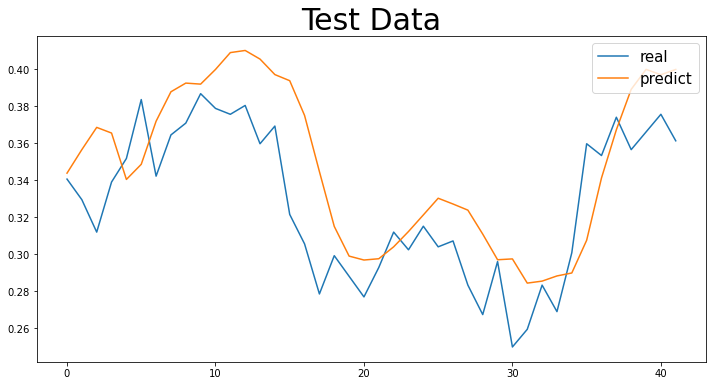

In [151]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_justified_1)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [216]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

print('修正后测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_justified_1, y_test))
print(mean_squared_error(y_justified_1, y_test) )
print(mape(y_justified_1, y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]

y_var_predict=np.zeros(len(y_justified_1))
y_var_predict[0] = 0
for i in range(1,len(y_justified_1)):
    y_var_predict[i] = y_justified_1[i] - y_justified_1[i-1]

txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

修正后测试集上的MAE/MSE/MAPE
0.026519765505108255
0.001040385602227034
7.526364230669788
预测涨跌正确: 0.5853658536585366


In [228]:
relative_error = 0.
for i in range(42):
    relative_error += (abs(y_justified_1[i] - y_test[i]) / y_test[i]) ** 2
acc = 1- np.sqrt(relative_error / 42)
print(f'模型的测试准确率为：{acc*100:.2f}%')

模型的测试准确率为：89.71%


In [156]:
df1['emotion'] = 0
for i in range(len(df1)):
    if df1['SI'][i]<0:
        df1['emotion'][i] = -1
    elif df1['SI'][i]>0:
        df1['emotion'][i] = 1
df1.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_728/234917048.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emotion'][i] = 1
C:\Users\admin\AppData\Local\Temp/ipykernel_728/234917048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emotion'][i] = -1


,时间,开盘,最高,最低,收盘,涨幅,振幅,成交次数,金额,target,BI,SI,DIS,emotion
0,2024/2/26,44.60,44.80,44.25,44.60,-0.10,-0.2237,2363402,105429946,44.75,0.693147,0.438153,0.000000,1
1,2024/2/27,44.60,44.80,44.20,44.75,0.15,0.3363,2955102,131820606,44.10,-0.693147,-0.276965,0.000000,-1
2,2024/2/28,44.80,44.85,43.75,44.10,-0.65,-1.4525,3501100,154552070,44.40,0.000000,0.000000,0.000000,0
3,2024/2/29,44.00,44.75,43.95,44.40,0.30,0.6803,5031510,223557591,42.90,1.098612,0.592566,0.000000,1
4,2024/3/1,43.65,43.65,42.90,42.90,-1.50,-3.3784,4850531,209192806,42.40,-1.531476,-1.091195,0.325581,-1


In [181]:
weight_1 = 0.05
y_justified_2 = y_test_predict + weight_1 * y_test_predict * df1['emotion']
y_justified_2

0     0.357512
1     0.340749
2     0.368507
3     0.378776
4     0.331308
5     0.335681
6     0.360380
7     0.373723
8     0.376705
9     0.375883
10    0.381079
11    0.390473
12    0.391620
13    0.388306
14    0.379690
15    0.376905
16    0.358854
17    0.331472
18    0.301367
19    0.284986
20    0.284734
21    0.285271
22    0.291615
23    0.298765
24    0.305655
25    0.314230
26    0.312562
27    0.339844
28    0.298334
29    0.283522
30    0.283750
31    0.277251
32    0.273433
33    0.276998
34    0.278550
35    0.296802
36    0.329577
37    0.351374
38    0.375594
39    0.384283
40    0.416702
41    0.399812
Name: emotion, dtype: float64

Text(0.5, 1.0, 'Test Data')

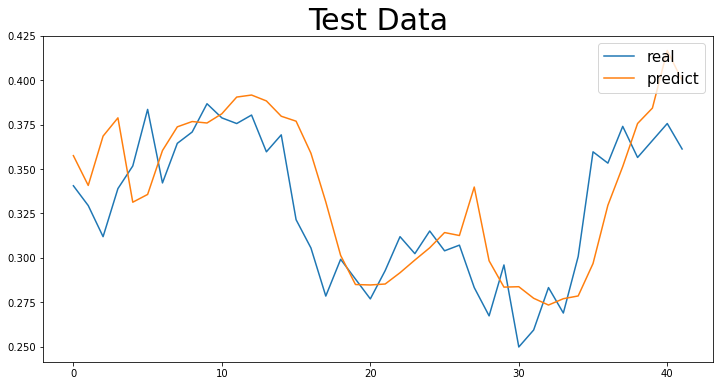

In [182]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_justified_2)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [215]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

print('修正后测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_justified_2, y_test))
print(mean_squared_error(y_justified_2, y_test) )
print(mape(y_justified_2, y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]

y_var_predict=np.zeros(len(y_justified_2))
y_var_predict[0] = 0
for i in range(1,len(y_justified_2)):
    y_var_predict[i] = y_justified_2[i] - y_justified_2[i-1]

txt=np.zeros(len(y_var_test-1))
for i in range(len(y_var_test)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

修正后测试集上的MAE/MSE/MAPE
0.02272193786053073
0.0008240832997590592
6.696314495541545
预测涨跌正确: 0.6097560975609756


In [229]:
relative_error = 0.
for i in range(42):
    relative_error += (abs(y_justified_2[i] - y_test[i]) / y_test[i]) ** 2
acc = 1- np.sqrt(relative_error / 42)
print(f'模型的测试准确率为：{acc*100:.2f}%')

模型的测试准确率为：90.98%


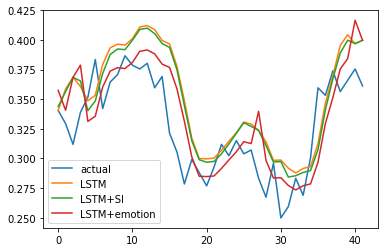

In [220]:
import matplotlib.pyplot as plt

plt.plot(y_test, label='actual')
plt.plot(y_test_predict, label='LSTM')
plt.plot(y_justified_1, label='LSTM+SI')
plt.plot(y_justified_2, label='LSTM+emotion')
plt.legend()

In [217]:
#分割线

In [27]:
df1=df1.iloc[1:-10,1:]
df1.head()

,开盘,最高,最低,收盘,涨幅,振幅,成交次数,金额,target,BI,SI,DIS
1,44.60,44.80,44.20,44.75,0.15,0.3363,2955102,131820606,44.10,-0.693147,-0.276965,0.000000
2,44.80,44.85,43.75,44.10,-0.65,-1.4525,3501100,154552070,44.40,0.000000,0.000000,0.000000
3,44.00,44.75,43.95,44.40,0.30,0.6803,5031510,223557591,42.90,1.098612,0.592566,0.000000
4,43.65,43.65,42.90,42.90,-1.50,-3.3784,4850531,209192806,42.40,-1.531476,-1.091195,0.325581
5,42.90,42.90,41.65,42.40,-0.50,-1.1655,8681933,366278416,41.55,-0.704708,-0.616963,0.000000


In [29]:
from sklearn import preprocessing#进行归一化操作
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
df=df.drop('target',axis=1)
df.head()

,开盘,最高,最低,收盘,涨幅,振幅,成交次数,金额,BI,SI,DIS
0,0.950617,0.974026,1.000000,1.000000,0.492537,0.483261,0.000000,0.018490,0.367588,0.505747,0.000000
1,1.000000,0.987013,0.883117,0.841463,0.253731,0.254599,0.094485,0.113342,0.612238,0.663178,0.000000
2,0.802469,0.961039,0.935065,0.914634,0.537313,0.527234,0.359324,0.401283,1.000000,1.000000,0.000000
3,0.716049,0.675325,0.662338,0.548780,0.000000,0.008411,0.328005,0.341342,0.071694,0.042927,0.336133
4,0.530864,0.480519,0.337662,0.426829,0.298507,0.291286,0.991032,0.996816,0.363507,0.312487,0.000000


In [30]:
#技术问题 重新对列做一个排序
order = ['开盘', '最高', '最低', '涨幅','振幅', '成交次数', '金额','BI','SI','DIS','收盘']
df = df[order]
df.tail()

,开盘,最高,最低,涨幅,振幅,成交次数,金额,BI,SI,DIS,收盘
26,0.925926,0.935065,0.870130,0.283582,0.282453,0.196227,0.221724,0.668832,0.673062,0.000000,0.817073
27,0.864198,1.000000,1.000000,0.537313,0.527426,0.106748,0.131088,0.350367,0.400231,0.780348,0.890244
28,0.777778,0.974026,0.922078,0.537313,0.526838,0.407972,0.457323,0.567118,0.536014,0.824074,0.963415
29,0.728395,0.857143,0.792208,0.313433,0.311291,0.076506,0.091388,0.551582,0.554650,0.795146,0.853659
30,0.777778,0.831169,0.766234,0.313433,0.309975,0.236186,0.256076,0.000000,0.000000,0.898967,0.743902


In [31]:
feanum=11#一共有多少特征
window=5#时间窗设置

In [39]:
#这一部分在处理数据 将原始数据改造为LSTM网络的输入
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.values#pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度+1
result = []
for index in range(len(data) - sequence_length):#循环 数据长度-时间窗长度 次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到样本，样本形式为 window*feanum
cut=5#分训练集测试集 最后cut个样本为测试集
train = result[:-cut, :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[-cut:, :-1]
y_test = result[-cut:, -1][:,-1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

In [40]:
#展示下训练集测试集的形状 看有没有问题
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (20, 5, 11)
y_train (20,)
X_test (5, 5, 11)
y_test (5,)


In [41]:
#建立、训练模型过程
d = 0.0001
model = Sequential()#建立层次模型
model.add(LSTM(64, input_shape=(window, feanum), return_sequences=True))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(LSTM(16, input_shape=(window, feanum), return_sequences=False))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(Dense(4,kernel_initializer='uniform',activation='relu'))   #建立全连接层     
model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, epochs =100, batch_size = 256) #训练模型nb_epoch次

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.1610 - accuracy: 0.0500
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.0500
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.1596 - accuracy: 0.0500
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1589 - accuracy: 0.0500
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1582 - accuracy: 0.0500
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.1574 - accuracy: 0.0500
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.1566 - accuracy: 0.0500
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.1557 - accuracy: 0.0500
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1549 - accuracy: 0.0500
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1540 - accuracy: 0.0500
Epoch 11/100
1/1 [===========

In [42]:
#总结模型
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 64)             19456     
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 64)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 24,713
Trainable params: 24,713
Non-trainable params: 0
__________________________________________________

In [43]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)[:,0]
y_train=y_train

Text(0.5, 1.0, 'Train Data')

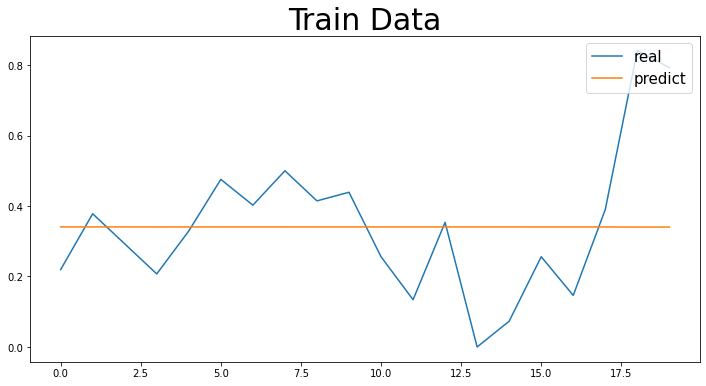

In [44]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[0:50,0].plot(figsize=(12,6))
draw.iloc[0:50,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [45]:
#在测试集上的预测
y_test_predict=model.predict(X_test)[:,0]
y_test=y_test

Text(0.5, 1.0, 'Test Data')

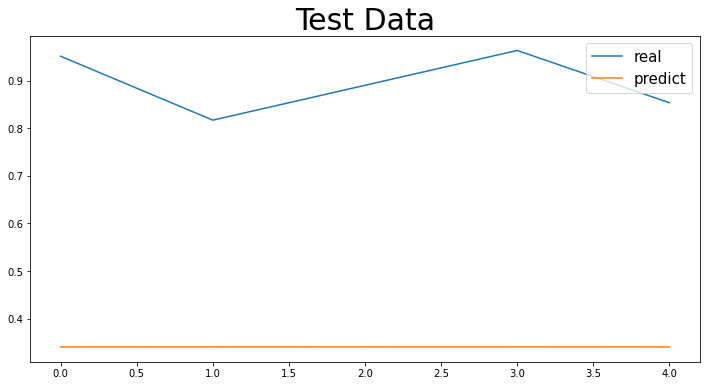

In [46]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [47]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.15368400714019453
0.041977422022595884
45.132477824195746
测试集上的MAE/MSE/MAPE
0.5544116808146964
0.31050063914039316
162.72200289487202
预测涨跌正确: 0.75
